In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('heart_2022_no_nans.csv')

In [114]:
df.shape

(246022, 40)

In [37]:
df.groupby('HadCOPD').size()

HadCOPD
0    227028
1     18994
dtype: int64

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [5]:
df.head(15)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
5,Alabama,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.85,120.20,34.96,Yes,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
6,Alabama,Female,Good,3.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,"6 or more, but not all",No,...,1.63,88.00,33.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
7,Alabama,Male,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,Yes,...,1.75,74.84,24.37,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
8,Alabama,Male,Good,2.0,0.0,5 or more years ago,No,6.0,None of them,No,...,1.70,78.02,26.94,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
9,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.68,63.50,22.60,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [6]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


<Axes: ylabel='HeightInMeters'>

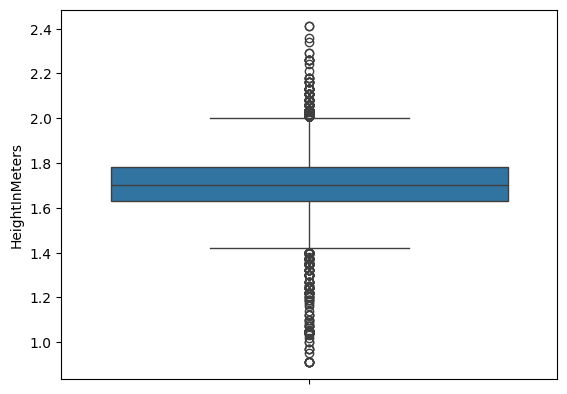

In [7]:
sns.boxplot(df['HeightInMeters'])

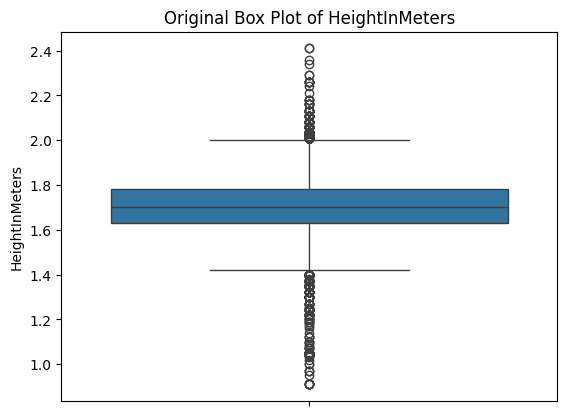

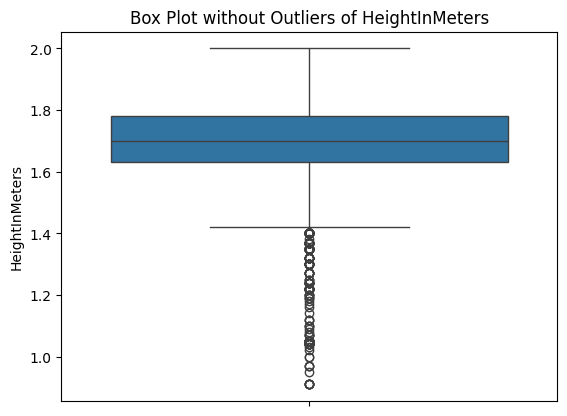

In [8]:
def removal_box_plot(df, column, upper_threshold, lower_threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers_upper = df[df[column] <= upper_threshold]
    removed_outliers_lower = df[df[column] >= lower_threshold]
 
    sns.boxplot(removed_outliers_upper[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers_upper
 
upper_threshold_value = 2
lower_threshold_value = 1.38
 
no_outliers = removal_box_plot(df, 'HeightInMeters', upper_threshold_value , lower_threshold_value)

In [9]:
height_column = df[df['HeightInMeters'] == 0.91]
print(height_column)

             State     Sex GeneralHealth  PhysicalHealthDays  \
13386     Arkansas    Male          Poor                30.0   
23185     Colorado    Male          Fair                 3.0   
36257      Florida    Male          Good                 7.0   
58093      Indiana  Female     Excellent                 0.0   
66346         Iowa  Female          Poor                 0.0   
137738  New Jersey  Female          Fair                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
13386                0.0  Within past year (anytime less than 12 months ...   
23185                2.0  Within past year (anytime less than 12 months ...   
36257                0.0  Within past year (anytime less than 12 months ...   
58093                2.0  Within past year (anytime less than 12 months ...   
66346               30.0  Within past year (anytime less than 12 months ...   
137738               5.0  Within past year (anytime less than 12 months ...  

In [10]:
height_column = df[df['HeightInMeters'] == 2.41]
print(height_column)

          State   Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
121635  Montana  Male          Fair                 0.0              10.0   
196046    Texas  Male          Good                 0.0               0.0   

                                          LastCheckupTime PhysicalActivities  \
121635  Within past year (anytime less than 12 months ...                Yes   
196046  Within past year (anytime less than 12 months ...                Yes   

        SleepHours  RemovedTeeth HadHeartAttack  ... HeightInMeters  \
121635         8.0  None of them            Yes  ...           2.41   
196046         6.0  None of them             No  ...           2.41   

       WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
121635            116.12  19.94             Yes         No          Yes   
196046             90.72  15.58             Yes         No           No   

       PneumoVaxEver                                  TetanusLast10Tdap  \
121635      

<Axes: ylabel='WeightInKilograms'>

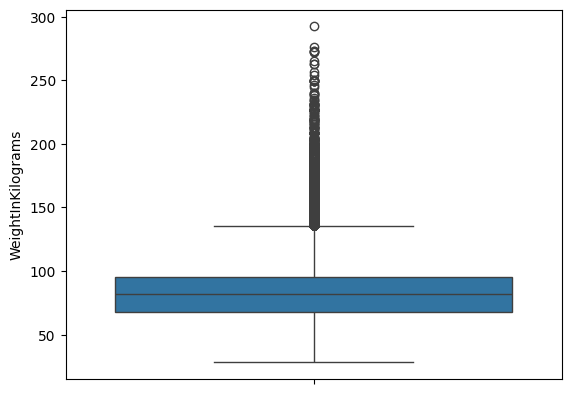

In [11]:
sns.boxplot(df['WeightInKilograms'])

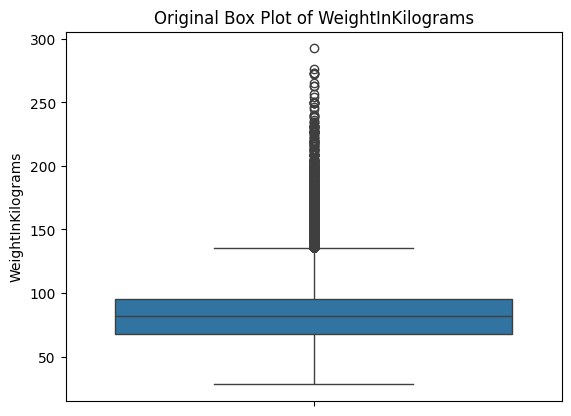

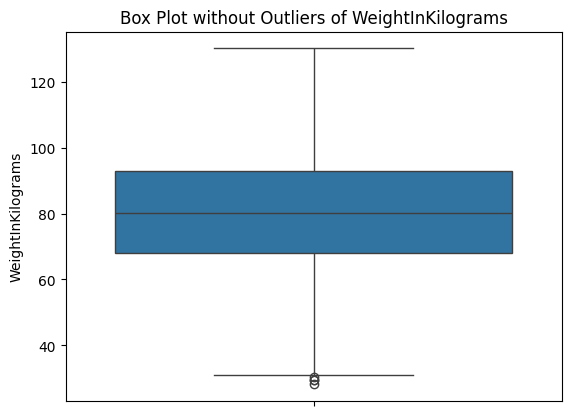

In [12]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers= df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
threshold_value = 130.5
 
no_outliers = removal_box_plot(df, 'WeightInKilograms', threshold_value)

In [13]:
weight_column = df[df['WeightInKilograms'] == 28.12]
print(weight_column)

                 State     Sex GeneralHealth  PhysicalHealthDays  \
179326  South Carolina  Female     Very good                 0.0   

        MentalHealthDays      LastCheckupTime PhysicalActivities  SleepHours  \
179326               0.0  5 or more years ago                 No         8.0   

        RemovedTeeth HadHeartAttack  ... HeightInMeters WeightInKilograms  \
179326  None of them             No  ...           1.52             28.12   

          BMI AlcoholDrinkers HIVTesting FluVaxLast12 PneumoVaxEver  \
179326  12.11              No         No           No            No   

                                        TetanusLast10Tdap HighRiskLastYear  \
179326  No, did not receive any tetanus shot in the pa...               No   

       CovidPos  
179326       No  

[1 rows x 40 columns]


In [14]:
weight_column = df[df['WeightInKilograms'] == 292.57]
print(weight_column)

        State   Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
9060  Arizona  Male          Fair                15.0              15.0   

                                        LastCheckupTime PhysicalActivities  \
9060  Within past year (anytime less than 12 months ...                 No   

      SleepHours  RemovedTeeth HadHeartAttack  ... HeightInMeters  \
9060         8.0  None of them             No  ...           1.85   

     WeightInKilograms   BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
9060            292.57  85.1              No         No           No   

     PneumoVaxEver   TetanusLast10Tdap HighRiskLastYear CovidPos  
9060            No  Yes, received Tdap               No       No  

[1 rows x 40 columns]


<Axes: ylabel='BMI'>

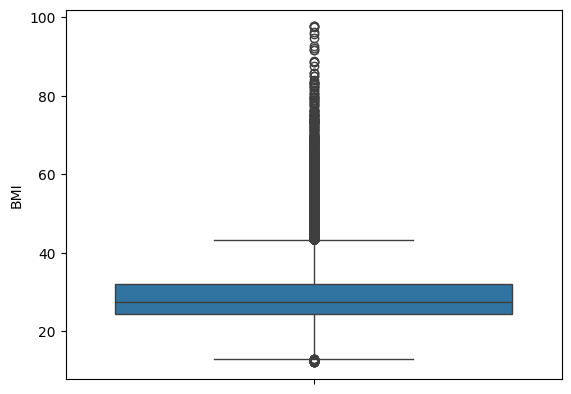

In [5]:
sns.boxplot(df['BMI'])

In [16]:
bmi_column = df[df['BMI'] == 12.02]
print(bmi_column)

       State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
158296  Ohio  Female     Very good                 0.0               0.0   

                                          LastCheckupTime PhysicalActivities  \
158296  Within past year (anytime less than 12 months ...                Yes   

        SleepHours  RemovedTeeth HadHeartAttack  ... HeightInMeters  \
158296         7.0  None of them             No  ...           1.63   

       WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
158296             31.75  12.02              No         No          Yes   

       PneumoVaxEver                                  TetanusLast10Tdap  \
158296           Yes  No, did not receive any tetanus shot in the pa...   

       HighRiskLastYear CovidPos  
158296               No       No  

[1 rows x 40 columns]


In [17]:
bmi_column = df[df['BMI'] == 97.65]
print(bmi_column)

                State     Sex GeneralHealth  PhysicalHealthDays  \
23185        Colorado    Male          Fair                 3.0   
40238         Georgia  Female     Very good                 0.0   
132435  New Hampshire  Female          Fair                21.0   

        MentalHealthDays                                    LastCheckupTime  \
23185                2.0  Within past year (anytime less than 12 months ...   
40238                0.0  Within past year (anytime less than 12 months ...   
132435               0.0  Within past year (anytime less than 12 months ...   

       PhysicalActivities  SleepHours  RemovedTeeth HadHeartAttack  ...  \
23185                 Yes         8.0        1 to 5             No  ...   
40238                 Yes         8.0  None of them             No  ...   
132435                Yes         6.0        1 to 5             No  ...   

       HeightInMeters WeightInKilograms    BMI AlcoholDrinkers HIVTesting  \
23185            0.91             81

In [11]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [3]:
df = df.drop(columns=['State', 'RaceEthnicityCategory'])

In [4]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Sex'. 
df['Sex']= label_encoder.fit_transform(df['Sex']) 
print(df.head())

   Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0    0     Very good                 4.0               0.0   
1    1     Very good                 0.0               0.0   
2    1     Very good                 0.0               0.0   
3    0          Fair                 5.0               0.0   
4    0          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack HadAngina  ...  \
0         9.0            None of them             No        No  ...   
1         6.0            None of t

In [5]:
df

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,1,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,1,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,0,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,0,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,1,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,0,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,1,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,0,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [6]:
binary = {'Yes' : 1, 'No' : 0}

df['PhysicalActivities'] = df['PhysicalActivities'].replace(binary)
df['HadHeartAttack'] = df['HadHeartAttack'].replace(binary)
df['HadAngina'] = df['HadAngina'].replace(binary)
df['HadStroke'] = df['HadStroke'].replace(binary)
df['HadAsthma'] = df['HadAsthma'].replace(binary)
df['HadSkinCancer'] = df['HadSkinCancer'].replace(binary)
df['HadCOPD'] = df['HadCOPD'].replace(binary)
df['HadDepressiveDisorder'] = df['HadDepressiveDisorder'].replace(binary)
df['HadKidneyDisease'] = df['HadKidneyDisease'].replace(binary)
df['HadArthritis'] = df['HadArthritis'].replace(binary)
df['DeafOrHardOfHearing'] = df['DeafOrHardOfHearing'].replace(binary)
df['BlindOrVisionDifficulty'] = df['BlindOrVisionDifficulty'].replace(binary)
df['DifficultyConcentrating'] = df['DifficultyConcentrating'].replace(binary)
df['DifficultyWalking'] = df['DifficultyWalking'].replace(binary)
df['DifficultyDressingBathing'] = df['DifficultyDressingBathing'].replace(binary)
df['DifficultyErrands'] = df['DifficultyErrands'].replace(binary)
df['ChestScan'] = df['ChestScan'].replace(binary)
df['AlcoholDrinkers'] = df['AlcoholDrinkers'].replace(binary)
df['HIVTesting'] = df['HIVTesting'].replace(binary)
df['FluVaxLast12'] = df['FluVaxLast12'].replace(binary)
df['PneumoVaxEver'] = df['PneumoVaxEver'].replace(binary)
df['HighRiskLastYear'] = df['HighRiskLastYear'].replace(binary)

D:\TEMP\ipykernel_14640\3195215391.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PhysicalActivities'] = df['PhysicalActivities'].replace(binary)
D:\TEMP\ipykernel_14640\3195215391.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HadHeartAttack'] = df['HadHeartAttack'].replace(binary)
D:\TEMP\ipykernel_14640\3195215391.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in

In [54]:
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,0,...,1.60,71.67,27.99,0,0,1,1,"Yes, received Tdap",0,No
1,1,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,1,6.0,None of them,0,0,...,1.78,95.25,30.13,0,0,1,1,"Yes, received tetanus shot but not sure what type",0,No
2,1,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,"6 or more, but not all",0,0,...,1.85,108.86,31.66,1,0,0,1,"No, did not receive any tetanus shot in the pa...",0,Yes
3,0,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,0,...,1.70,90.72,31.32,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,Yes
4,0,Good,3.0,15.0,Within past year (anytime less than 12 months ...,1,5.0,1 to 5,0,0,...,1.55,79.38,33.07,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,No


In [7]:
mappingGen = {'Excellent' : 4, 'Very good' : 3, 'Good' : 2, 'Fair' : 1, 'Poor' : 0}
df['GeneralHealth'] = df['GeneralHealth'].replace(mappingGen)

mappingLast = {'Within past year (anytime less than 12 months ago)' : 3, 'Within past 2 years (1 year but less than 2 years ago)' : 2, 'Within past 5 years (2 years but less than 5 years ago)' : 1, '5 or more years ago' : 0}
df['LastCheckupTime'] = df['LastCheckupTime'].replace(mappingLast)

mappingRemoved = {'None of them' : 3, '1 to 5' : 2, '6 or more, but not all' : 1, 'All' : 0}
df['RemovedTeeth'] = df['RemovedTeeth'].replace(mappingRemoved)

mappingDiabet = {'No' : 3, 'No, pre-diabetes or borderline diabetes' : 2, 'Yes, but only during pregnancy (female)' : 1, 'Yes' : 0}
df['HadDiabetes'] = df['HadDiabetes'].replace(mappingDiabet)

mappingSmoker = {'Never smoked' : 3, 'Former smoker' : 2, 'Current smoker - now smokes some days' : 1, 'Current smoker - now smokes every day' : 0}
df['SmokerStatus'] = df['SmokerStatus'].replace(mappingSmoker)

mappingECigar = {'Never used e-cigarettes in my entire life' : 3, 'Not at all (right now)' : 2, 'Use them some days' : 1, 'Use them every day' : 0}
df['ECigaretteUsage'] = df['ECigaretteUsage'].replace(mappingECigar)

mappingAge = {'Age 80 or older' : 12, 'Age 75 to 79' : 11, 'Age 70 to 74' : 10, 'Age 65 to 69' : 9, 'Age 60 to 64' : 8, 'Age 55 to 59' : 7, 'Age 50 to 54' : 6, 'Age 45 to 49' : 5, 'Age 40 to 44' : 4, 'Age 35 to 39' : 3, 'Age 30 to 34' : 2, 'Age 25 to 29' : 1, 'Age 18 to 24' : 0}
df['AgeCategory'] = df['AgeCategory'].replace(mappingAge)

mappingTdap = {'Yes, received Tdap' : 3, 'Yes, received tetanus shot but not sure what type' : 2, 'Yes, received tetanus shot, but not Tdap' : 1, 'No, did not receive any tetanus shot in the past 10 years' : 0}
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].replace(mappingTdap)

mappingCov = {'No' : 2, 'Tested positive using home test without a health professional' : 1, 'Yes' : 0}
df['CovidPos'] = df['CovidPos'].replace(mappingCov)

D:\TEMP\ipykernel_14640\1263536317.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GeneralHealth'] = df['GeneralHealth'].replace(mappingGen)
D:\TEMP\ipykernel_14640\1263536317.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LastCheckupTime'] = df['LastCheckupTime'].replace(mappingLast)
D:\TEMP\ipykernel_14640\1263536317.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-i

In [8]:
df

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,3,4.0,0.0,3,1,9.0,3,0,0,...,1.60,71.67,27.99,0,0,1,1,3,0,2
1,1,3,0.0,0.0,3,1,6.0,3,0,0,...,1.78,95.25,30.13,0,0,1,1,2,0,2
2,1,3,0.0,0.0,3,0,8.0,1,0,0,...,1.85,108.86,31.66,1,0,0,1,0,0,0
3,0,1,5.0,0.0,3,1,9.0,3,0,0,...,1.70,90.72,31.32,0,0,1,1,0,0,0
4,0,2,3.0,15.0,3,1,5.0,2,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,1,3,0.0,0.0,2,1,6.0,3,0,0,...,1.78,102.06,32.28,1,0,0,0,2,0,2
246018,0,1,0.0,7.0,3,1,7.0,3,0,0,...,1.93,90.72,24.34,0,0,0,0,0,0,0
246019,1,2,0.0,15.0,3,1,7.0,2,0,0,...,1.68,83.91,29.86,1,1,1,1,2,0,0
246020,0,4,2.0,2.0,3,1,7.0,3,0,0,...,1.70,83.01,28.66,0,1,1,0,2,0,2


In [217]:
pd.set_option('display.max_columns', None)
display(df)

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,3,4.0,0.0,3,1,9.0,3,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,2,3,0,9,1.60,71.67,27.99,0,0,1,1,3,0,2
1,1,3,0.0,0.0,3,1,6.0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,3,0,10,1.78,95.25,30.13,0,0,1,1,2,0,2
2,1,3,0.0,0.0,3,0,8.0,1,0,0,0,0,0,0,0,0,1,3,0,1,0,1,0,0,2,3,1,11,1.85,108.86,31.66,1,0,0,1,0,0,0
3,0,1,5.0,0.0,3,1,9.0,3,0,0,0,0,1,0,1,0,1,3,0,0,0,1,0,0,3,3,0,12,1.70,90.72,31.32,0,0,1,1,0,0,0
4,0,2,3.0,15.0,3,1,5.0,2,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,3,3,0,12,1.55,79.38,33.07,0,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,1,3,0.0,0.0,2,1,6.0,3,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,3,0,8,1.78,102.06,32.28,1,0,0,0,2,0,2
246018,0,1,0.0,7.0,3,1,7.0,3,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,3,3,0,1,1.93,90.72,24.34,0,0,0,0,0,0,0
246019,1,2,0.0,15.0,3,1,7.0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,3,3,0,9,1.68,83.91,29.86,1,1,1,1,2,0,0
246020,0,4,2.0,2.0,3,1,7.0,3,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,3,0,6,1.70,83.01,28.66,0,1,1,0,2,0,2


In [9]:
X = df[['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']]
y = df[['HadHeartAttack']]

#membagi data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
#Package untuk klasifikasi KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, f1_score

#Mengaktifkasn fungsi klasifikasi untuk KNN dengan nilai k rentang 2-10
for K in range(2,11,2):
    knn = KNeighborsClassifier (n_neighbors = K)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_pred
    knn.predict_proba(X_test)
    #Melihat hasil dari balance accuracy
    print('Balance Accuracy: ',balanced_accuracy_score(y_test, y_pred))

    #Melihat hasil dari confusion matrix
    print(confusion_matrix(y_test, y_pred))

    #Melihat hasil dari classification report
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))

    #Melihat hasil dari f1 score
    f1_micro = f1_score(y_test, y_pred, average = 'micro')
    f1_macro = f1_score(y_test, y_pred, average = 'macro')
    f1_weighted = f1_score(y_test, y_pred, average = 'weighted')

    print('F1 Score (Micro):', f1_micro)
    print('F1 Score (Macro):', f1_macro)
    print('F1 Score (Weighted):', f1_weighted)

C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Balance Accuracy:  0.5080604594861039
[[46297   166]
 [ 2688    54]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46463
           1       0.25      0.02      0.04      2742

    accuracy                           0.94     49205
   macro avg       0.60      0.51      0.50     49205
weighted avg       0.91      0.94      0.92     49205

F1 Score (Micro): 0.9419977644548319
F1 Score (Macro): 0.5032803760606155
F1 Score (Weighted): 0.9180710024902056


C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Balance Accuracy:  0.5063786470848635
[[46361   102]
 [ 2701    41]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     46463
           1       0.29      0.01      0.03      2742

    accuracy                           0.94     49205
   macro avg       0.62      0.51      0.50     49205
weighted avg       0.91      0.94      0.92     49205

F1 Score (Micro): 0.9430342444873488
F1 Score (Macro): 0.4995398865251186
F1 Score (Weighted): 0.9181499215956425


C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Balance Accuracy:  0.5052970942754493
[[46413    50]
 [ 2710    32]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     46463
           1       0.39      0.01      0.02      2742

    accuracy                           0.94     49205
   macro avg       0.67      0.51      0.50     49205
weighted avg       0.91      0.94      0.92     49205

F1 Score (Micro): 0.9439081394167259
F1 Score (Macro): 0.49689418407249536
F1 Score (Weighted): 0.9182714105575885


C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Balance Accuracy:  0.5023053723382603
[[46440    23]
 [ 2728    14]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     46463
           1       0.38      0.01      0.01      2742

    accuracy                           0.94     49205
   macro avg       0.66      0.50      0.49     49205
weighted avg       0.91      0.94      0.92     49205

F1 Score (Micro): 0.9440910476577583
F1 Score (Macro): 0.4906543721383729
F1 Score (Weighted): 0.9176716661198284


C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Balance Accuracy:  0.5009649568930663
[[46451    12]
 [ 2736     6]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     46463
           1       0.33      0.00      0.00      2742

    accuracy                           0.94     49205
   macro avg       0.64      0.50      0.49     49205
weighted avg       0.91      0.94      0.92     49205

F1 Score (Micro): 0.9441520170714358
F1 Score (Macro): 0.4878090411145708
F1 Score (Weighted): 0.917387494162479


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, f1_score

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 5, 7, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

# Prediction on test data
y_pred = knn.predict(X_test)

#Melihat hasil dari balance accuracy
print('Balance Accuracy: ',balanced_accuracy_score(y_test, y_pred))

#Melihat hasil dari confusion matrix
print(confusion_matrix(y_test, y_pred))

#Melihat hasil dari classification report
print('Classification Report: ')
print(classification_report(y_test, y_pred))

#Melihat hasil dari f1 score
f1_micro = f1_score(y_test, y_pred, average = 'micro')
f1_macro = f1_score(y_test, y_pred, average = 'macro')
f1_weighted = f1_score(y_test, y_pred, average = 'weighted')

print('F1 Score (Micro):', f1_micro)
print('F1 Score (Macro):', f1_macro)
print('F1 Score (Weighted):', f1_weighted)

C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, f1_score

dt = DecisionTreeClassifier()
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

grid_obj = GridSearchCV(dt, parameters)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Melihat hasil dari balance accuracy
print('Balance Accuracy: ',balanced_accuracy_score(y_test, y_pred))

#Melihat hasil dari confusion matrix
print(confusion_matrix(y_test, y_pred))

#Melihat hasil dari classification report
print('Classification Report: ')
print(classification_report(y_test, y_pred))

#Melihat hasil dari f1 score
f1_micro = f1_score(y_test, y_pred, average = 'micro')
f1_macro = f1_score(y_test, y_pred, average = 'macro')
f1_weighted = f1_score(y_test, y_pred, average = 'weighted')

print('F1 Score (Micro):', f1_micro)
print('F1 Score (Macro):', f1_macro)
print('F1 Score (Weighted):', f1_weighted)

C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

Balance Accuracy:  0.5751606146129499
[[46178   285]
 [ 2313   429]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     46463
           1       0.60      0.16      0.25      2742

    accuracy                           0.95     49205
   macro avg       0.78      0.58      0.61     49205
weighted avg       0.93      0.95      0.93     49205

F1 Score (Micro): 0.9472004877553094
F1 Score (Macro): 0.6104516360846071
F1 Score (Weighted): 0.9322728025340329


In [226]:
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy:  0.9442739558987908
Confusion Matrix:
[[46463     0]
 [ 2742     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     46463
           1       0.00      0.00      0.00      2742

    accuracy                           0.94     49205
   macro avg       0.47      0.50      0.49     49205
weighted avg       0.89      0.94      0.92     49205



C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, f1_score

rf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

#Melihat hasil dari balance accuracy
print('Balance Accuracy: ',balanced_accuracy_score(y_test, y_pred))

#Melihat hasil dari confusion matrix
print(confusion_matrix(y_test, y_pred))

#Melihat hasil dari classification report
print('Classification Report: ')
print(classification_report(y_test, y_pred))

#Melihat hasil dari f1 score
f1_micro = f1_score(y_test, y_pred, average = 'micro')
f1_macro = f1_score(y_test, y_pred, average = 'macro')
f1_weighted = f1_score(y_test, y_pred, average = 'weighted')

print('F1 Score (Micro):', f1_micro)
print('F1 Score (Macro):', f1_macro)
print('F1 Score (Weighted):', f1_weighted)

C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionW

Balance Accuracy:  0.5476420631504738
[[46332   131]
 [ 2473   269]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46463
           1       0.67      0.10      0.17      2742

    accuracy                           0.95     49205
   macro avg       0.81      0.55      0.57     49205
weighted avg       0.93      0.95      0.93     49205

F1 Score (Micro): 0.9470785489279545
F1 Score (Macro): 0.5719475497806356
F1 Score (Weighted): 0.928005609692494


In [228]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

print('Classification Report: ')
print(classification_report(y_test, y_pred))

Accuracy:  0.9476475967889442
Confusion Matrix: 
[[46157   306]
 [ 2270   472]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     46463
           1       0.61      0.17      0.27      2742

    accuracy                           0.95     49205
   macro avg       0.78      0.58      0.62     49205
weighted avg       0.93      0.95      0.93     49205

